In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 

In [27]:
#loading Dataset iris
x,y = load_iris(return_X_y= True)
#x -> here is the frature Matrix
#y -> is the target Vector 
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)


In [29]:
rf = RandomForestClassifier(random_state=42)


In [30]:
my_param_grid = {
    'n_estimators': [10, 50, 70, 100], #using how many number of trees we need    
    'max_depth': [None, 5, 7, 10],       #the maxdepth  
    'min_samples_split': [2, 5, 7]       #min number of samples required to make a split  
}

In [31]:
#GridSearch
my_grid_search = GridSearchCV(
    estimator=rf,
    param_grid=my_param_grid,
    scoring='accuracy',
    n_jobs=-1)



In [32]:
#providing data to my grid 
my_grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 7, 10],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [10, 50, 70, 100]},
             scoring='accuracy')

In [33]:
#this is the function to find the best parameters 
my_grid_search.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 70}

In [34]:
#finding out the best_params 
best_param = my_grid_search.best_estimator_
print(best_param)

RandomForestClassifier(n_estimators=70, random_state=42)


In [35]:
#fit this with , 
y_predicted= best_param.predict(x_test)
print(y_predicted.shape)


(45,)


In [36]:
print("Test accuracy:", accuracy_score(y_test, y_predicted))

Test accuracy: 1.0


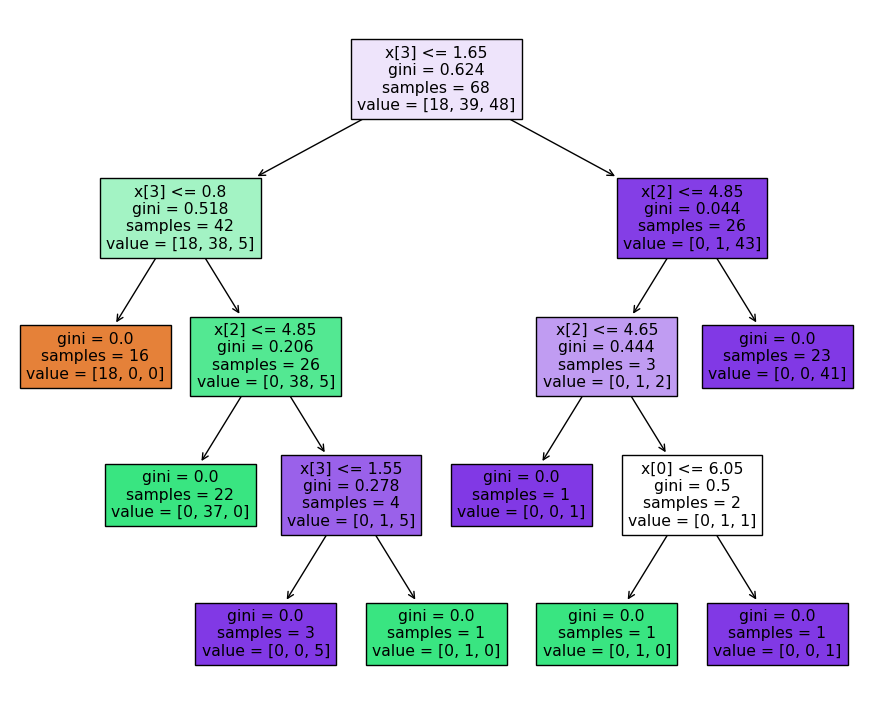

In [42]:
plt.figure(figsize=(11,9))
tree0 = best_param.estimators_[0]
plot_tree(tree0, filled = True)
plt.show()
